<a href="https://colab.research.google.com/github/HectorCedilloCharles1/MineriaDeDatos/blob/main/Visualizacion_Equipo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 2-Visualización de datos**

---


#Equipo: 5
#Grupo: 001 Frecuencia: Lunes 7-10pm
#Integrantes:
* 1844452 - Castillo Rodríguez, Leonardo Daniel
* 1851642 - Cedillo Charles, Hector
* 1877422 - Martinez Ortuño, Gustavo Juan
* 1851701 - Navarrete Rosales, Jose Eduardo
* 1869864 - Morales Salazar, César Alejandro


# European Soccer Score Card Database

**a)** European Soccer Score Card Database

**b)** Url: https://www.kaggle.com/omercolakoglu/european-soccer-score-card-database

* **Importar librerias y base de datos**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as gra

###Nuevas modificaciones a la base previo a las estadísticas y gráficas
Tomaremos como base la última versión de nuestros datos, que ya han sido trabajados en la práctica de limpieza de datos. Borraremos la columna de unamed que se generó al guardar nuestra nueva base de datos. Finalmente, al trabajar con los datos nos dimos cuenta que hay ligas con un nivel inferior al que buscamos, por ejemplo, no hay punto de comparación entre la liga inglesa y la liga de escocia, la diferencia de nivel es abismal, por lo que un jugador que tenga buenos números en la liga escosesa, dificilmente lo tendrá en una de las ligas de máximo nivel, que es a donde nuestro estudio está enfocado, las ligas que serán removidas son:
 

*   Poland Ekstraklasa
*   Scotland Premier League
*   Belgium Jupiter League
*   Switzerland Super League



In [ ]:
base_soccer=pd.read_table('/content/Base Soccer Scorecards Modificada.csv', sep=',')
del(base_soccer['Unnamed: 0'])
del(base_soccer['Pais'])
del(base_soccer['Autogoles'])
del(base_soccer['Gol cruzado'])
del(base_soccer['Conteo'])
del(base_soccer['Resultado'])
del(base_soccer['CARDCOUNT_R'])
del(base_soccer['Victorias'])
del(base_soccer['Derrotas'])
del(base_soccer['Empates'])
base_soccer= base_soccer.drop(base_soccer[base_soccer['NombreLiga']=='Belgium Jupiler League'].index)
base_soccer= base_soccer.drop(base_soccer[base_soccer['NombreLiga']=='Poland Ekstraklasa'].index)
base_soccer= base_soccer.drop(base_soccer[base_soccer['NombreLiga']=='Scotland Premier League'].index)
base_soccer= base_soccer.drop(base_soccer[base_soccer['NombreLiga']=='Switzerland Super League'].index)
base_soccer.to_csv("Base Soccer Scorecards Filtrada.csv")
base_soccer

,ID,Nombre del jugador,Edad,Estatura,ID Equipo,Equipo,ID Partido,Tipo equipo,Fecha,Otro equipo,NombreLiga,Goles,Fauls,1raAmarilla,2daAmarilla,Año,Temporada,Calificacion general,PREFERRED_FOOT,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,Dribbling,Efecto,PrecisionTiroLibre,PaseLargo,ControlBalon,Aceleracion,VelocidadMaxima,Agilidad,Reaccion,Balance,FuerzaTiro,Salto,Resistencia,Fuerza,TirosLargos,AGGRESSION,Intercepciones,Posicionamiento,Vision,Penalties,Marca,Entradas,Barridas,POR_Estirada,POR_Paradas,POR_Despeje,POR_Posicionamiento,POR_Reflejos,GolLocal,GolVisitante,Estatus
32965,30726,Edwin van der Sar,38,198,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,0,0,0,2008,2008/2009,85.000000,right,20.0,20.0,20.0,27.0,12.0,20.0,12.0,11.0,85.0,22.0,32.0,41.0,57.0,68.0,51.0,29.0,60.0,63.0,76.0,20.0,57.0,78.0,55.0,40.0,43.0,20.0,33.0,11.0,88.0,86.0,85.0,88.0,84.0,1,1,EQUAL
32966,30362,Wes Brown,29,185,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,2,1,0,2008,2008/2009,80.000000,right,69.0,23.0,77.0,60.0,31.0,45.0,41.0,24.0,55.0,63.0,73.0,76.0,51.0,71.0,67.0,43.0,81.0,79.0,82.0,29.0,85.0,79.0,81.0,58.0,67.0,83.0,84.0,85.0,7.0,23.0,55.0,23.0,23.0,1,1,EQUAL
32967,30620,Rio Ferdinand,30,193,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,1,0,0,2008,2008/2009,87.000000,right,45.0,39.0,87.0,80.0,51.0,60.0,51.0,27.0,70.0,78.0,78.0,80.0,52.0,82.0,80.0,59.0,87.0,80.0,87.0,29.0,84.0,83.0,84.0,69.0,92.0,89.0,94.0,87.0,10.0,22.0,70.0,22.0,22.0,1,1,EQUAL
32968,30865,Nemanja Vidic,27,190,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,2,0,0,2008,2008/2009,86.000000,right,40.0,38.0,93.0,68.0,41.0,42.0,43.0,48.0,70.0,69.0,74.0,75.0,52.0,76.0,84.0,60.0,92.0,79.0,92.0,35.0,93.0,81.0,84.0,63.0,79.0,84.0,90.0,85.0,10.0,23.0,70.0,23.0,23.0,1,1,EQUAL
32969,32569,Patrice Evra,27,175,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,1,0,0,2008,2008/2009,84.000000,left,79.0,52.0,74.0,77.0,53.0,83.0,77.0,51.0,85.0,80.0,93.0,92.0,84.0,89.0,80.0,74.0,86.0,93.0,74.0,50.0,82.0,78.0,79.0,76.0,73.0,79.0,85.0,91.0,13.0,20.0,85.0,20.0,20.0,1,1,EQUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513459,161651,Jose Canas,28,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,Spain LIGA BBVA,0,0,0,0,2015,2015/2016,76.333333,right,52.0,34.0,49.0,76.0,26.0,47.0,46.0,55.0,71.0,71.0,65.0,64.0,57.0,79.0,73.0,50.0,71.0,81.0,70.0,59.0,83.0,81.0,56.0,72.0,46.0,73.0,80.0,70.0,13.0,11.0,8.0,10.0,8.0,3,0,LOSS
513460,88986,Hernan Perez,26,180,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,Spain LIGA BBVA,0,0,0,0,2015,2015/2016,72.714286,right,70.0,69.0,53.0,71.0,58.0,77.0,57.0,53.0,64.0,75.0,80.0,79.0,78.0,67.0,69.0,83.0,77.0,72.0,69.0,73.0,73.0,40.0,74.0,63.0,47.0,20.0,23.0,18.0,12.0,12.0,13.0,7.0,14.0,3,0,LOSS
513461,498033,Marco Asensio,19,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,Spain LIGA BBVA,0,1,0,0,2015,2015/2016,72.500000,left,73.0,61.0,46.0,77.0,51.0,75.0,65.0,59.0,72.0,78.0,69.0,63.0,69.0,70.0,75.0,55.0,54.0,64.0,56.0,60.0,44.0,32.0,66.0,74.0,55.0,29.0,38.0,38.0,12.0,8.0,5.0,11.0,9.0,3,0,LOSS
513462,52004,Victor Alvarez,22,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,Spain LIGA BBVA,0,0,0,0,2015,2015/2016,71.000000,left,73.0,36.0,62.0,69.0,31.0,68.0,66.0,57.0,64.0,73.0,77.0,77.0,75.0,73.0,71.0,55.0,71.0,78.0,67.0,56.0,71.0,69.0,62.0,65.0,43.0,70.0,67.0,70.0,8.0,8.0,5.0,5.0,6.0,3,0,LOSS


In [ ]:
base_soccer=pd.read_table('/content/Base Soccer Scorecards Filtrada.csv', sep=',')
del(base_soccer['Unnamed: 0'])

Adicionalmente, creamos una base de datos con registros únicos de partidos, esto para calcular las estadísticas por equipos/ligas.

In [ ]:
base_unica_partidos=base_soccer.drop_duplicates(subset = "ID Partido")
print(base_unica_partidos)
base_unica_partidos.to_csv("Base Soccer Partidos.csv")

            ID    Nombre del jugador  Edad  ...  GolLocal  GolVisitante Estatus
0        30726     Edwin van der Sar    38  ...         1             1   EQUAL
22       23686        Manuel Almunia    31  ...         1             0     WIN
44       32562          Craig Gordon    26  ...         0             1    LOSS
66       36374          Robert Green    28  ...         2             1     WIN
88       30380          Brad Friedel    37  ...         4             2     WIN
...        ...                   ...   ...  ...       ...           ...     ...
410641  177126             Jan Oblak    22  ...         2             1     WIN
410663   25563         Carlos Kameni    31  ...         2             0     WIN
410685   33764  Gorka Iraizoz Moreno    34  ...         3             0     WIN
410707  104986      Andres Fernandez    29  ...         1             1   EQUAL
410729   37579                  Tono    36  ...         3             0     WIN

[18776 rows x 55 columns]


## Estadísticas de la base de fútbol.

En ésta práctica se realizarán todas las estadísticas vistas en clase, sin embargo, no todas tienen la misma relevancia para nuestros objetivos, aquellas que sean más importantes estaran más detalladas en el avance del proyecto. Mayoritariamente, aquellas que nos serán de mayor utilidad son los promedios, desviaciones estándar, conteos, entre otros. Nos interesará en el futuro tener una base de datos con registros únicos de los jugadores con sus datos totales, por lo que, la iremos creando conforme vemos las estadísticas.

###Conteo: Jugadores con más de 1 temporada activos
Buscamos una constancia y eficicacia en nuestros jugadores, eliminaremos aquellos que tengan menos de 20 partidos disputados, para ello, modificaremos la base utilizando la función count.

In [ ]:
#ELIMINAMOS LOS DATOS
del(base_soccer['Estatus'])
base_soccer['Estatus']=pd.read_table('/content/Resultado.csv', sep=',')
jugadores=base_soccer['ID'].unique().tolist()
sorted(jugadores)
for i in jugadores:
  if base_soccer.loc[base_soccer['ID']==i,'ID'].count()<20:
    base_soccer= base_soccer.drop(base_soccer[base_soccer['ID']==i].index)
base_soccer.to_csv("Base Soccer Scorecards Filtrada Oficial.csv")
base_soccer

,ID,Nombre del jugador,Edad,Estatura,ID Equipo,Equipo,ID Partido,Tipo equipo,Fecha,Otro equipo,NombreLiga,Goles,Fauls,1raAmarilla,2daAmarilla,Año,Temporada,Calificacion general,PREFERRED_FOOT,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,Dribbling,Efecto,PrecisionTiroLibre,PaseLargo,ControlBalon,Aceleracion,VelocidadMaxima,Agilidad,Reaccion,Balance,FuerzaTiro,Salto,Resistencia,Fuerza,TirosLargos,AGGRESSION,Intercepciones,Posicionamiento,Vision,Penalties,Marca,Entradas,Barridas,POR_Estirada,POR_Paradas,POR_Despeje,POR_Posicionamiento,POR_Reflejos,GolLocal,GolVisitante,Estatus
0,30726,Edwin van der Sar,38,198,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,0,0,0,2008,2008/2009,85.000000,right,20.0,20.0,20.0,27.0,12.0,20.0,12.0,11.0,85.0,22.0,32.0,41.0,57.0,68.0,51.0,29.0,60.0,63.0,76.0,20.0,57.0,78.0,55.0,40.0,43.0,20.0,33.0,11.0,88.0,86.0,85.0,88.0,84.0,1,1,1.0
1,30362,Wes Brown,29,185,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,2,1,0,2008,2008/2009,80.000000,right,69.0,23.0,77.0,60.0,31.0,45.0,41.0,24.0,55.0,63.0,73.0,76.0,51.0,71.0,67.0,43.0,81.0,79.0,82.0,29.0,85.0,79.0,81.0,58.0,67.0,83.0,84.0,85.0,7.0,23.0,55.0,23.0,23.0,1,1,1.0
2,30620,Rio Ferdinand,30,193,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,1,0,0,2008,2008/2009,87.000000,right,45.0,39.0,87.0,80.0,51.0,60.0,51.0,27.0,70.0,78.0,78.0,80.0,52.0,82.0,80.0,59.0,87.0,80.0,87.0,29.0,84.0,83.0,84.0,69.0,92.0,89.0,94.0,87.0,10.0,22.0,70.0,22.0,22.0,1,1,1.0
3,30865,Nemanja Vidic,27,190,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,2,0,0,2008,2008/2009,86.000000,right,40.0,38.0,93.0,68.0,41.0,42.0,43.0,48.0,70.0,69.0,74.0,75.0,52.0,76.0,84.0,60.0,92.0,79.0,92.0,35.0,93.0,81.0,84.0,63.0,79.0,84.0,90.0,85.0,10.0,23.0,70.0,23.0,23.0,1,1,1.0
4,32569,Patrice Evra,27,175,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,England Premier League,0,1,0,0,2008,2008/2009,84.000000,left,79.0,52.0,74.0,77.0,53.0,83.0,77.0,51.0,85.0,80.0,93.0,92.0,84.0,89.0,80.0,74.0,86.0,93.0,74.0,50.0,82.0,78.0,79.0,76.0,73.0,79.0,85.0,91.0,13.0,20.0,85.0,20.0,20.0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410746,161651,Jose Canas,28,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,Spain LIGA BBVA,0,0,0,0,2015,2015/2016,76.333333,right,52.0,34.0,49.0,76.0,26.0,47.0,46.0,55.0,71.0,71.0,65.0,64.0,57.0,79.0,73.0,50.0,71.0,81.0,70.0,59.0,83.0,81.0,56.0,72.0,46.0,73.0,80.0,70.0,13.0,11.0,8.0,10.0,8.0,3,0,0.0
410747,88986,Hernan Perez,26,180,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,Spain LIGA BBVA,0,0,0,0,2015,2015/2016,72.714286,right,70.0,69.0,53.0,71.0,58.0,77.0,57.0,53.0,64.0,75.0,80.0,79.0,78.0,67.0,69.0,83.0,77.0,72.0,69.0,73.0,73.0,40.0,74.0,63.0,47.0,20.0,23.0,18.0,12.0,12.0,13.0,7.0,14.0,3,0,0.0
410748,498033,Marco Asensio,19,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,Spain LIGA BBVA,0,1,0,0,2015,2015/2016,72.500000,left,73.0,61.0,46.0,77.0,51.0,75.0,65.0,59.0,72.0,78.0,69.0,63.0,69.0,70.0,75.0,55.0,54.0,64.0,56.0,60.0,44.0,32.0,66.0,74.0,55.0,29.0,38.0,38.0,12.0,8.0,5.0,11.0,9.0,3,0,0.0
410749,52004,Victor Alvarez,22,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,Spain LIGA BBVA,0,0,0,0,2015,2015/2016,71.000000,left,73.0,36.0,62.0,69.0,31.0,68.0,66.0,57.0,64.0,73.0,77.0,77.0,75.0,73.0,71.0,55.0,71.0,78.0,67.0,56.0,71.0,69.0,62.0,65.0,43.0,70.0,67.0,70.0,8.0,8.0,5.0,5.0,6.0,3,0,0.0


### Suma: Cantidad de goles

In [ ]:
#Calculamos las sumas de los goles a favor y en contra
f=base_unica_partidos['GolLocal'].sum()
print("El número total de goles de local es de",f)
c=base_unica_partidos['GolVisitante'].sum()
print("El número total de goles de visita es de",c)
print("El número total de goles es de",f+c)
#Analizando los goles de acuerdo a la liga
#INGLESA
PLf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','GolLocal'].sum()
PLc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','GolVisitante'].sum()
print("El número total de goles en la Premier League  es de",PLf+PLc)
#ITALIANA
Sf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','GolLocal'].sum()
Sc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','GolVisitante'].sum()
print("El número total de goles en la Serie A es de",Sf+Sc)
#FRANCESA
L1f=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','GolLocal'].sum()
L1c=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','GolVisitante'].sum()
print("El número total de goles en la Ligue 1 es de",L1f+L1c)
#ESPAÑOLA
Esf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','GolLocal'].sum()
Esc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','GolVisitante'].sum()
print("El número total de goles en la Liga BBVA es de",Esf+Esc)
#ALEMANA
Bf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','GolLocal'].sum()
Bc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','GolVisitante'].sum()
print("El número total de goles en la Bundesliga es de",Bf+Bc)
#HOLANDESA
ERf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','GolLocal'].sum()
ERc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','GolVisitante'].sum()
print("El número total de goles en la Eredivise es de",ERf+ERc)
#PORTUGUESA
Pf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Portugal Liga ZON Sagres','GolLocal'].sum()
Pc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Portugal Liga ZON Sagres','GolVisitante'].sum()
print("El número total de goles en la Liga NOS es de",Pf+Pc)

El número total de goles de local es de 29211
El número total de goles de visita es de 21793
El número total de goles es de 51004
El número total de goles en la Premier League  es de 8240
El número total de goles en la Serie A es de 7895
El número total de goles en la Ligue 1 es de 7427
El número total de goles en la Liga BBVA es de 8412
El número total de goles en la Bundesliga es de 7103
El número total de goles en la Eredivise es de 6953
El número total de goles en la Liga NOS es de 4974


In [ ]:
#Obtenemos los datos totales de goles, tarjetas recibidas, faltas y los guardamos en una nueva base
base_soccer=pd.read_table('/content/Base Soccer Scorecards Filtrada Oficial.csv', sep=',')
base_jugadores_totales= pd.DataFrame()
base_jugadores_totales['ID']=base_soccer['ID'].unique().tolist()
goles=[]
faul=[]
tar1=[]
tar2=[]
for i in base_jugadores_totales['ID']:
  goles.append(base_soccer.loc[base_soccer['ID']==i,'Goles'].sum())
  faul.append(base_soccer.loc[base_soccer['ID']==i,'Fauls'].sum())
  tar1.append(base_soccer.loc[base_soccer['ID']==i,'1raAmarilla'].sum())
  tar2.append(base_soccer.loc[base_soccer['ID']==i,'2daAmarilla'].sum())
base_jugadores_totales['Goles']=goles
base_jugadores_totales['Faltas']=faul
base_jugadores_totales['1raAmarilla']=tar1
base_jugadores_totales['2daAmarilla']=tar2

### Media: Goles por jugador por partido, calificación promedio, estadísticas promedio.

In [ ]:
#Calculamos las medias de los goles 
mtf=base_unica_partidos['GolLocal'].mean()
mtc=base_unica_partidos['GolVisitante'].mean()
media=(mtc+mtf)/2
print("El promedio de goles por partido es de ",media)
#Calculamos la edad promedio de los jugadores
edadp=base_soccer['Edad'].mean()
print("El promedio de edad de los jugadores es de ",edadp)
#Calculamos el promedio de goles, calificaciones, victorias y estadisticas generales
golp=[]
calf=[]
vic=[]
est=[]
for i in base_jugadores_totales['ID']:
  golp.append(base_soccer.loc[base_soccer['ID']==i,'Goles'].mean())
  calf.append(base_soccer.loc[base_soccer['ID']==i,'Calificacion general'].mean())
  vic.append(base_soccer.loc[base_soccer['ID']==i,'Estatus'].mean())
  est.append(base_soccer.loc[base_soccer['ID']==i,'Estatura'].mean())
base_jugadores_totales['Goles Promedio']=golp
base_jugadores_totales['Calificacion Promedio']=calf
base_jugadores_totales['Win rate']=vic
base_jugadores_totales['Estatura']=est

El promedio de goles por partido es de  1.3582232637409457
El promedio de edad de los jugadores es de  26.86605523548712


In [ ]:
#Caracteristicas del jugador
cru=[]
fin=[]
cab=[]
pco=[]
vol=[]
dri=[]
ef=[]
pre=[]
pla=[]
con=[]
ac=[]
vel=[]
ag=[]
rea=[]
bal=[]
ft=[]
sal=[]
re=[]
f=[]
tl=[]
agr=[]
inte=[]
pos=[]
vis=[]
pen=[]
mar=[]
ent=[]
bar=[]
po1=[]
po2=[]
po3=[]
po4=[]
po5=[]
for i in base_jugadores_totales['ID']:
  cru.append(base_soccer.loc[base_soccer['ID']==i,'Cruce'].mean())
  fin.append(base_soccer.loc[base_soccer['ID']==i,'Finalizacion'].mean())
  cab.append(base_soccer.loc[base_soccer['ID']==i,'Cabeceo'].mean())
  pco.append(base_soccer.loc[base_soccer['ID']==i,'PaseCorto'].mean())
  vol.append(base_soccer.loc[base_soccer['ID']==i,'Voleas'].mean())
  dri.append(base_soccer.loc[base_soccer['ID']==i,'Dribbling'].mean())
  ef.append(base_soccer.loc[base_soccer['ID']==i,'Efecto'].mean())
  pre.append(base_soccer.loc[base_soccer['ID']==i,'PrecisionTiroLibre'].mean())
  pla.append(base_soccer.loc[base_soccer['ID']==i,'PaseLargo'].mean())
  con.append(base_soccer.loc[base_soccer['ID']==i,'ControlBalon'].mean())
  ac.append(base_soccer.loc[base_soccer['ID']==i,'Aceleracion'].mean())
  vel.append(base_soccer.loc[base_soccer['ID']==i,'VelocidadMaxima'].mean())
  ag.append(base_soccer.loc[base_soccer['ID']==i,'Agilidad'].mean())
  rea.append(base_soccer.loc[base_soccer['ID']==i,'Reaccion'].mean())
  bal.append(base_soccer.loc[base_soccer['ID']==i,'Balance'].mean())
  ft.append(base_soccer.loc[base_soccer['ID']==i,'FuerzaTiro'].mean())
  sal.append(base_soccer.loc[base_soccer['ID']==i,'Salto'].mean())
  re.append(base_soccer.loc[base_soccer['ID']==i,'Resistencia'].mean())
  f.append(base_soccer.loc[base_soccer['ID']==i,'Fuerza'].mean())
  tl.append(base_soccer.loc[base_soccer['ID']==i,'TirosLargos'].mean())
  agr.append(base_soccer.loc[base_soccer['ID']==i,'AGGRESSION'].mean())
  inte.append(base_soccer.loc[base_soccer['ID']==i,'Intercepciones'].mean())
  pos.append(base_soccer.loc[base_soccer['ID']==i,'Posicionamiento'].mean())
  vis.append(base_soccer.loc[base_soccer['ID']==i,'Vision'].mean())
  pen.append(base_soccer.loc[base_soccer['ID']==i,'Penalties'].mean())
  mar.append(base_soccer.loc[base_soccer['ID']==i,'Marca'].mean())
  ent.append(base_soccer.loc[base_soccer['ID']==i,'Entradas'].mean())
  bar.append(base_soccer.loc[base_soccer['ID']==i,'Barridas'].mean())
  po1.append(base_soccer.loc[base_soccer['ID']==i,'POR_Estirada'].mean())
  po2.append(base_soccer.loc[base_soccer['ID']==i,'POR_Paradas'].mean())
  po3.append(base_soccer.loc[base_soccer['ID']==i,'POR_Despeje'].mean())
  po4.append(base_soccer.loc[base_soccer['ID']==i,'POR_Posicionamiento'].mean())
  po5.append(base_soccer.loc[base_soccer['ID']==i,'POR_Reflejos'].mean())
base_jugadores_totales['Cruce']=cru
base_jugadores_totales['Finalizacion']=fin
base_jugadores_totales['Cabeceo']=cab
base_jugadores_totales['PaseCorto']=pco
base_jugadores_totales['Voleas']=vol
base_jugadores_totales['Dribbling']=dri
base_jugadores_totales['Efecto']=ef
base_jugadores_totales['Precision']=pre
base_jugadores_totales['PaseLargo']=pla
base_jugadores_totales['Control']=con
base_jugadores_totales['Aceleracion']=ac
base_jugadores_totales['Velocidad']=vel
base_jugadores_totales['Agilidad']=ag
base_jugadores_totales['Reaccion']=rea
base_jugadores_totales['Balance']=bal
base_jugadores_totales['FuerzaTiro']=ft
base_jugadores_totales['Salto']=sal
base_jugadores_totales['Resistencia']=re
base_jugadores_totales['Fuerza']=f
base_jugadores_totales['TiroLargo']=tl
base_jugadores_totales['Agresividad']=agr
base_jugadores_totales['Intercepcion']=inte
base_jugadores_totales['Posicionamiento']=pos
base_jugadores_totales['Vision']=vis
base_jugadores_totales['Penales']=pen
base_jugadores_totales['Marcaje']=mar
base_jugadores_totales['Entrada']=ent
base_jugadores_totales['Barridas']=bar
base_jugadores_totales['POR_EST']=po1
base_jugadores_totales['POR_PA']=po2
base_jugadores_totales['POR_DES']=po3
base_jugadores_totales['POR_POS']=po4
base_jugadores_totales['POR_REF']=po5

In [ ]:
#Calificacion promedio de los jugadores por liga
#INGLESA
PL1=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','Calificacion general'].mean()
print("El promedio de calificacion en la Premier League  es de",PL1)
#ITALIANA
S=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','Calificacion general'].mean()
print("El promedio de calificacion en la Serie A es de",S)
#FRANCESA
L1=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','Calificacion general'].mean()
print("El promedio de calificacion en la Ligue 1 es de",L1)
#ESPAÑOLA
Es=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','Calificacion general'].mean()
print("El promedio de calificacion en la Liga BBVA es de",Es)
#ALEMANA
B=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','Calificacion general'].mean()
print("El El promedio de calificacion en la Bundesliga es de",B)
#HOLANDESA
E=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','Calificacion general'].mean()
print("El promedio de calificacion en la Eredevise es de",E)
#PORTUGUESA
P=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Portugal Liga ZON Sagres','Calificacion general'].mean()
print("El promedio de calificacion en la Liga NOS es de",P)

El promedio de calificacion en la Premier League  es de 77.88148349446293
El promedio de calificacion en la Serie A es de 76.16337496179689
El promedio de calificacion en la Ligue 1 es de 74.82151389290051
El promedio de calificacion en la Liga BBVA es de 76.25484996774651
El El promedio de calificacion en la Bundesliga es de 76.5051392203144
El promedio de calificacion en la Eredevise es de 69.93335384945111
El promedio de calificacion en la Liga NOS es de 71.4720286746535


###Suma acumulada: Faltas totales

In [ ]:
a = base_soccer['Fauls'].cumsum() #Suma acumulada de las faltas totales
print('\033[1m'+"La suma acumulada de las faltas totales es:"+'\033[0m')#Realizamos el titulo
print(a) #Imprimimos la suma acumulada de faltas totales 
#Suma acumulada de faltas segun cada liga
#Inglesa
b = base_soccer.loc[base_soccer['NombreLiga']=='England Premier League','Fauls'].cumsum() #Suma acumulada de las faltas de la liga inglesa
print('\033[1m'+'La suma acumulada de las faltas totales de la liga inglesa es:'+'\033[0m') #Titulo
print(b) #Imprimimos la suma acumulada de faltas de la liga inglesa
#Italiana
c = base_soccer.loc[base_soccer['NombreLiga']=='Italy Serie A','Fauls'].cumsum() #Suma acumulada de las faltas de la liga italiana
print('\033[1m'+'La suma acumulada de las faltas totales de la liga italiana es:'+'\033[0m') #Titulo
print(c) #Imprimimos la suma acumulada de faltas de la liga italania
#Francesa
d = base_soccer.loc[base_soccer['NombreLiga']=='France Ligue 1','Fauls'].cumsum() #Suma acumulada de las faltas de la liga francesa
print('\033[1m'+'La suma acumulada de las faltas totales de la liga francesa es:'+'\033[0m') #Titulo
print(d) #Imprimimos la suma acumulada de faltas de la liga francesa
#Española
e = base_soccer.loc[base_soccer['NombreLiga']=='Spain LIGA BBVA','Fauls'].cumsum() #Suma acumulada de las faltas de la liga española
print('\033[1m'+'La suma acumulada de las faltas totales de la liga española es:'+'\033[0m') #Titulo
print(e) #Imprimimos la suma acumulada de faltas de la liga española
#Alemana
f = base_soccer.loc[base_soccer['NombreLiga']=='Germany 1. Bundesliga','Fauls'].cumsum() #Suma acumulada de las faltas de la liga alemana
print('\033[1m'+'La suma acumulada de las faltas totales de la liga alemana es:'+'\033[0m') #Titulo
print(f) #Imprimimos la suma acumulada de faltas de la liga alemana
#Holandesa
h = base_soccer.loc[base_soccer['NombreLiga']=='Netherlands Eredivisie','Fauls'].cumsum() #Suma acumulada de las faltas de la liga holandesa
print('\033[1m'+'La suma acumulada de las faltas totales de la liga holandesa es:'+'\033[0m') #Titulo
print(h) #Imprimimos la suma acumulada de faltas de la liga holandesa

La suma acumulada de las faltas totales es:
0              0
1              2
2              3
3              5
4              6
           ...  
387065    181534
387066    181534
387067    181535
387068    181535
387069    181537
Name: Fauls, Length: 387070, dtype: int64
La suma acumulada de las faltas totales de la liga inglesa es:
0            0
1            2
2            3
3            5
4            6
         ...  
64198    57832
64199    57832
64200    57832
64201    57834
64202    57839
Name: Fauls, Length: 64203, dtype: int64
La suma acumulada de las faltas totales de la liga italiana es:
177733        0
177734        0
177735        0
177736        0
177737        0
          ...  
240540    36791
240541    36791
240542    36794
240543    36795
240544    36798
Name: Fauls, Length: 62812, dtype: int64
La suma acumulada de las faltas totales de la liga francesa es:
64203         0
64204         0
64205         0
64206         0
64207         0
          ...  
127106    16971
1

###Resumen estadístico: Goles de local

In [ ]:
#Calculamos el resumen estadistico de los goles a favor
a = base_unica_partidos['GolLocal'].describe() #Resumen estadistico de los goles de local totales
print('\033[1m'+"El resumen estadistico de la cantidad de goles de local es:"+'\033[0m') #Titulo
print(a) #Imprimimos el resumen estadistico de los goles de local totales
#Analizando los goles de acuerdo a la liga
#INGLESA
b = base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','GolLocal'].describe() #Resumen estadistico de los goles de local de la liga inglesa
print('\033[1m'+"El resumen estadistico de la cantidad de goles de local de la liga inglesa es:"+'\033[0m') #Titulo
print(b) #Imprimimos el resumen estadistico de los goles de local de la liga inglesa
#ITALIANA
c = base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','GolLocal'].describe()  #Resumen estadistico de los goles de local de la liga italiana
print('\033[1m'+"El resumen estadistico de la cantidad de goles de local de la liga italiana es:"+'\033[0m') #Titulo
print(c) #Imprimimos el resumen estadistico de los goles de local de la liga italiana
#FRANCESA
d = base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','GolLocal'].describe()  #Resumen estadistico de los goles de local de la liga francesa
print('\033[1m'+"El resumen estadistico de la cantidad de goles de local de la liga francesa es:"+'\033[0m') #Titulo
print(d) #Imprimimos el resumen estadistico de los goles de local de la liga francesa
#ESPAÑOLA
e = base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','GolLocal'].describe()  #Resumen estadistico de los goles de local de la liga española
print('\033[1m'+"El resumen estadistico de la cantidad de goles de local de la liga española es:"+'\033[0m') #Titulo
print(e) #Imprimimos el resumen estadistico de los goles de local de la liga española
#ALEMANA
f = base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','GolLocal'].describe()  #Resumen estadistico de los goles de local de la liga alemana
print('\033[1m'+"El resumen estadistico de la cantidad de goles de local de la liga alemana es:"+'\033[0m') #Titulo
print(f) #Imprimimos el resumen estadistico de los goles de local de la liga alemana
#HOLANDESA
g = base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','GolLocal'].describe()  #Resumen estadistico de los goles de local de la liga holandesa
print('\033[1m'+"El resumen estadistico de la cantidad de goles de local de la liga holandesa es:"+'\033[0m') #Titulo
print(g) #Imprimimos el resumen estadistico de los goles de local de la liga holandesa
#PORTUGUESA
h = base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Portugal Liga ZON Sagres','GolLocal'].describe()  #Resumen estadistico de los goles de local de la liga holandesa
print('\033[1m'+"El resumen estadistico de la cantidad de goles de local de la liga portuguesa es:"+'\033[0m') #Titulo
print(h) #Imprimimos el resumen estadistico de los goles de local de la liga portuguesa

El resumen estadistico de la cantidad de goles de local es:
count    387070.000000
mean          1.556845
std           1.301887
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: GolLocal, dtype: float64
El resumen estadistico de la cantidad de goles de local de la liga inglesa es:
count    64203.000000
mean         1.548043
std          1.310936
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: GolLocal, dtype: float64
El resumen estadistico de la cantidad de goles de local de la liga italiana es:
count    62812.000000
mean         1.500143
std          1.222354
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: GolLocal, dtype: float64
El resumen estadistico de la cantidad de goles de local de la liga francesa es:
count    62908.000000
mean         1.403176
std          1.170407
min   

### Mínimo y Maximo: Edades

In [ ]:
#Calculamos la edad minima y maxima alcanzadas en el periodo analizado, esto con el fin de determinar "la mejor edad"
edmi=[]
edma=[]
for i in base_jugadores_totales['ID']:
  edmi.append(base_soccer.loc[base_soccer['ID']==i,'Edad'].min())
  edma.append(base_soccer.loc[base_soccer['ID']==i,'Edad'].max())
base_jugadores_totales['Edad Minima']=edmi
base_jugadores_totales['Edad Maxima']=edma

### Varianza y desviación estandar: Edad


In [ ]:
#Buscamos la varianza y desviación estandar de la edad
a = base_unica_partidos['Edad'].var()
b = base_unica_partidos['Edad'].std()
print("La varianza de edad de los jugadores de la base es:",round(a,2))
print("La desviación estandar de la edad de los jugadores de la base es:",round(b,2))
#Analizando las edades de acuerdo a la liga
#INGLESA
PLf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','Edad'].var()
PLc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','Edad'].std()
print("La varianza de edad de los jugadores registrados de la liga inglesa es:", round(PLf,2))
print("La desviación estandar de edad de los jugadores registrados de la liga inglesa es:", round(PLc,2))
#ITALIANA
Sf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','Edad'].var()
Sc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','Edad'].std()
print("La varianza de edad de los jugadores registrados de la liga italiana es:", round(Sf,2))
print("La desviación estandar de edad de los jugadores registrados de la liga italiana es:", round(Sc,2))
#ALEMANA
Bf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','Edad'].var()
Bc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','Edad'].std()
print("La varianza de edad de los jugadores registrados de la liga alemana es:", round(Bf,2))
print("La desviación estandar de edad de los jugadores registrados de la liga alemana es:", round(Bc,2))
#HOLANDESA
ERf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','Edad'].var()
ERc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','Edad'].std()
print("La varianza de edad de los jugadores registrados de la liga holandesa es:", round(ERf,2))
print("La desviación estandar de edad de los jugadores registrados de la liga holandesa es:", round(ERc,2))

La varianza de edad de los jugadores de la base es: 16.1
La desviación estandar de la edad de los jugadores de la base es: 4.01
La varianza de edad de los jugadores registrados de la liga inglesa es: 14.33
La desviación estandar de edad de los jugadores registrados de la liga inglesa es: 3.79
La varianza de edad de los jugadores registrados de la liga italiana es: 16.78
La desviación estandar de edad de los jugadores registrados de la liga italiana es: 4.1
La varianza de edad de los jugadores registrados de la liga alemana es: 14.89
La desviación estandar de edad de los jugadores registrados de la liga alemana es: 3.86
La varianza de edad de los jugadores registrados de la liga holandesa es: 15.74
La desviación estandar de edad de los jugadores registrados de la liga holandesa es: 3.97


###Valor de asimetria: Edad


In [ ]:
#Buscamos el valor de asimetria de la edad
a = base_unica_partidos['Edad'].skew()
print("El valor de asimetria de las edades registradas en la base es:",round(a,2))
#Analizando las edades de acuerdo a la liga
#INGLESA
PLf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','Edad'].skew()
print("El valor de asimetria de las edades registradas de la liga inglesa es:", round(PLf,2))
#ITALIANA
Sf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','Edad'].skew()
print("El valor de asimetria de las edades registradas de la liga italiana es:", round(Sf,2))
#FRANCESA
L1f=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','Edad'].skew()
print("El valor de asimetria de las edades registradas de la liga francesa es:", round(L1f,2))
#ESPAÑOLA
Esf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','Edad'].skew()
print("El valor de asimetria de las edades registradas de la liga española es:", round(Esf,2))
#ALEMANA
Bf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','Edad'].skew()
print("El valor de asimetria de las edades registradas de la liga alemana es:", round(Bf,2))
#HOLANDESA
ERf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','Edad'].skew()
print("El valor de asimetria de las edades registradas de la liga Holandesa es:", round(ERf,2))

El valor de asimetria de las edades registradas en la base es: 0.26
El valor de asimetria de las edades registradas de la liga inglesa es: 0.41
El valor de asimetria de las edades registradas de la liga italiana es: 0.04
El valor de asimetria de las edades registradas de la liga francesa es: 0.06
El valor de asimetria de las edades registradas de la liga española es: 0.06
El valor de asimetria de las edades registradas de la liga alemana es: 0.58
El valor de asimetria de las edades registradas de la liga Holandesa es: 0.88


###Caracteristica de forma de la distribución de probabilidad: Estatura

In [ ]:
#Buscamos la caracteristica de forma de la distribución de probabilidad de la estatura
a = base_unica_partidos['Estatura'].kurt()
print("La caracteristica de forma de la distrubución de probabilidad de las estaturas registradas en la base es:",round(a,2))
#Analizando la estatura de acuerdo a la liga
#INGLESA
PLf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','Estatura'].kurt()
print("La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga inglesa es:", round(PLf,2))
#ITALIANA
Sf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','Estatura'].kurt()
print("La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga italiana es:", round(Sf,2))
#FRANCESA
L1f=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','Estatura'].kurt()
print("La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga francesa es:", round(L1f,2))
#ESPAÑOLA
Esf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','Estatura'].kurt()
print("La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga española es:", round(Esf,2))
#ALEMANA
Bf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','Estatura'].kurt()
print("La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga alemana es:", round(Bf,2))
#HOLANDESA
ERf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','Estatura'].kurt()
print("La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga holandesa es:", round(ERf,2))
#PORTUGUESA
Pf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Portugal Liga ZON Sagres','Estatura'].kurt()
print("La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga portuguesa es:", round(Pf,2))

La caracteristica de forma de la distrubución de probabilidad de las estaturas registradas en la base es: -0.02
La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga inglesa es: -0.14
La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga italiana es: -0.38
La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga francesa es: 0.91
La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga española es: 0.41
La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga alemana es: 0.44
La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga holandesa es: -0.23
La caracteristica de forma de la distribución de probabilidad de las estaturas registradas de la liga portuguesa es: 1.46


###Correlacion de los datos

In [ ]:
base_unica_partidos.corr()

,ID,Edad,Estatura,ID Equipo,ID Partido,Goles,Fauls,1raAmarilla,2daAmarilla,Año,Calificacion general,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,Dribbling,Efecto,PrecisionTiroLibre,PaseLargo,ControlBalon,Aceleracion,VelocidadMaxima,Agilidad,Reaccion,Balance,FuerzaTiro,Salto,Resistencia,Fuerza,TirosLargos,AGGRESSION,Intercepciones,Posicionamiento,Vision,Penalties,Marca,Entradas,Barridas,POR_Estirada,POR_Paradas,POR_Despeje,POR_Posicionamiento,POR_Reflejos,GolLocal,GolVisitante
ID,1.000000,-0.472368,0.009778,0.025968,0.187213,0.003477,0.001177,-0.018672,-0.006644,0.384604,-0.322246,0.019909,0.014308,-0.012951,0.016843,0.141545,0.020187,0.132042,0.143861,-0.245025,-0.134800,-0.136387,-0.135380,-0.206834,-0.132509,-0.192804,-0.044944,-0.165733,-0.258942,-0.060883,0.038898,-0.286128,-0.231959,-0.156046,-0.203390,-0.213440,-0.005800,-0.008211,0.037879,-0.215748,-0.251946,-0.181249,-0.284770,-0.209779,-0.021435,0.025484
Edad,-0.472368,1.000000,-0.118988,0.007504,-0.010373,-0.010182,0.002526,0.035801,0.007133,-0.054072,0.175917,-0.038816,-0.020727,-0.047529,-0.068819,-0.034588,-0.056573,-0.002235,-0.089700,0.024622,0.015261,-0.084901,-0.034846,0.015774,0.092119,0.144499,-0.059403,0.059977,0.085548,0.142438,-0.087499,0.260466,0.115724,0.010821,0.161995,0.075549,-0.045040,-0.059906,-0.057820,0.096144,0.171619,0.072344,0.299033,0.045385,-0.010672,-0.009739
Estatura,0.009778,-0.118988,1.000000,-0.023556,-0.219092,-0.007481,0.009978,-0.018512,-0.007022,0.036012,0.153572,-0.069682,-0.014906,-0.048569,-0.013921,-0.034203,-0.044542,-0.062774,-0.059500,-0.006326,-0.131100,-0.053037,-0.035669,-0.202665,0.143520,-0.136602,0.052571,-0.148859,-0.002411,0.335027,-0.009746,0.055830,-0.025048,-0.000698,-0.020893,0.057615,-0.046104,-0.048907,-0.076128,0.168334,0.207627,0.057072,0.165370,0.145798,0.050949,-0.011505
ID Equipo,0.025968,0.007504,-0.023556,1.000000,0.040541,-0.002241,0.004122,-0.001639,-0.001064,0.073678,-0.050500,-0.014767,-0.010498,0.013825,-0.023516,0.023508,-0.009605,0.020404,0.009545,-0.044858,-0.022188,-0.030938,-0.031837,-0.009247,-0.003273,-0.015558,-0.037341,-0.010688,-0.048875,-0.001873,0.013481,-0.029109,-0.034385,-0.026755,-0.039373,-0.040744,0.013409,0.010500,0.013598,-0.044365,-0.048502,-0.055161,-0.027745,-0.040123,-0.024127,0.011864
ID Partido,0.187213,-0.010373,-0.219092,0.040541,1.000000,-0.016313,-0.014096,0.028818,0.012827,0.151898,-0.166775,0.010935,0.004663,0.002711,0.017267,0.089263,0.019360,0.117250,0.061280,-0.107384,-0.000944,-0.002711,0.023000,0.189915,0.014412,0.075325,0.018177,0.114405,-0.042911,0.092145,0.030262,-0.065139,-0.117297,-0.108102,-0.034430,-0.155969,0.004227,-0.019795,0.052183,-0.157159,-0.150919,-0.114881,-0.112457,-0.162253,0.026699,0.009476
Goles,0.003477,-0.010182,-0.007481,-0.002241,-0.016313,1.000000,0.007424,-0.002044,-0.000640,0.004462,-0.001336,0.014562,0.013519,0.021482,0.007538,0.013294,0.013800,0.002287,0.009506,-0.005152,0.013694,-0.000021,0.005615,-0.009796,-0.000545,-0.003557,0.005516,-0.000587,0.001834,0.008091,0.013765,0.010807,0.007022,0.010319,0.001630,0.005283,0.025465,0.018451,0.007841,-0.023276,-0.023622,-0.000062,-0.023033,-0.017920,-0.003791,0.031505
Fauls,0.001177,0.002526,0.009978,0.004122,-0.014096,0.007424,1.000000,0.212390,-0.001104,0.014491,0.029611,0.008173,0.002360,0.002813,0.015342,0.000025,0.003689,0.009645,0.003521,0.002400,0.008285,0.018213,0.016818,0.002780,0.022140,0.017917,-0.005246,0.018269,0.007747,0.012191,0.008556,0.007504,0.007530,0.018120,0.029921,0.012008,0.013266,0.009225,0.010647,0.003981,0.001385,0.008429,-0.001177,0.012304,-0.000525,0.037801
1raAmarilla,-0.018672,0.035801,-0.018512,-0.001639,0.028818,-0.002044,0.212390,1.000000,0.049476,0.005120,0.028299,-0.006214,-0.004276,0.000376,-0.012656,-0.007300,-0.007323,-0.002703,0.000203,-0.005878,-0.007532,0.028153,0.024967,0.014497,0.009903,0.033438,-0.008410,0.014673,0.009405,0.014933,0.000717,0.027308,0.001543,0.008319,0.013465,-0.005264,0.005445,-0.004846,-0.004716,0.012344,0.004310,0.003026,0.010914,0

###Covarianza de los datos

In [ ]:
base_unica_partidos.cov()

,ID,Edad,Estatura,ID Equipo,ID Partido,Goles,Fauls,1raAmarilla,2daAmarilla,Año,Calificacion general,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,Dribbling,Efecto,PrecisionTiroLibre,PaseLargo,ControlBalon,Aceleracion,VelocidadMaxima,Agilidad,Reaccion,Balance,FuerzaTiro,Salto,Resistencia,Fuerza,TirosLargos,AGGRESSION,Intercepciones,Posicionamiento,Vision,Penalties,Marca,Entradas,Barridas,POR_Estirada,POR_Paradas,POR_Despeje,POR_Posicionamiento,POR_Reflejos,GolLocal,GolVisitante
ID,7.696612e+09,-191756.399843,4076.517773,2.674162e+07,1.098051e+08,1.540541e+01,9.193922,-267.563173,-7.367232e+00,78346.813853,-159113.043600,11008.904112,7472.937708,-7996.529698,10986.732459,75554.122433,10616.243688,79944.905827,94374.887510,-378167.294752,-67807.288064,-115581.552670,-111468.340666,-191171.054452,-113147.478928,-193550.709139,-36781.118916,-138163.827985,-255977.246561,-52396.107979,19897.337235,-367843.529310,-298068.616954,-183391.434834,-232466.569973,-293869.117735,-3240.107267,-4782.493142,25583.899620,-144671.758336,-159813.304083,-119210.832700,-187631.155746,-138277.651048,-2446.540153,2566.299021
Edad,-1.917564e+05,21.411137,-2.616495,4.076053e+02,-3.208928e+02,-2.379262e-03,0.001041,0.027058,4.172082e-04,-0.580968,4.660153,-1.151541,-0.580799,-1.574392,-2.408423,-0.981392,-1.596199,-0.071928,-3.157039,2.038813,0.411858,-3.860170,-1.539283,0.774978,4.220120,7.710859,-2.608142,2.657813,4.537143,6.576620,-2.401310,17.965003,7.978179,0.682294,9.842179,5.580604,-1.350006,-1.872065,-2.075867,3.458853,5.840433,2.552781,10.570724,1.605013,-0.064248,-0.051728
Estatura,4.076518e+03,-2.616495,22.583536,-1.314044e+03,-6.960830e+03,-1.795192e-03,0.004222,-0.014369,-4.217867e-04,0.397371,4.182093,-2.125127,-0.429376,-1.653868,-0.500837,-1.004432,-1.291930,-2.090959,-2.152756,-0.538475,-3.637079,-2.478876,-1.619751,-10.305476,6.758891,-7.544428,2.372816,-6.827349,-0.131459,15.901798,-0.274967,3.958489,-1.775149,-0.045230,-1.313811,4.375005,-1.420565,-1.571121,-2.828808,6.225465,7.263575,2.070252,6.009397,5.300342,0.315007,-0.062757
ID Equipo,2.674162e+07,407.605285,-1314.043572,1.377887e+08,3.181515e+06,-1.328641e+00,4.308572,-3.143123,-1.579369e-01,2008.166352,-3292.344713,-1078.180811,-723.931980,1127.072959,-2025.420776,1659.653355,-666.929084,1633.950907,826.762568,-9141.475765,-1473.689304,-3461.825086,-3461.235608,-1130.386368,-369.001889,-2065.736116,-4034.972908,-1178.537849,-6379.434700,-212.845263,910.491423,-4941.198043,-5834.115569,-4151.647199,-5952.146225,-7407.004442,989.105623,807.551339,1214.785914,-3927.997559,-4062.184855,-4790.367045,-2413.719744,-3492.083795,-368.470222,159.851346
ID Partido,1.098051e+08,-320.892834,-6960.830243,3.181515e+06,4.469669e+07,-5.507252e+00,-8.391290,31.468431,1.083926e+00,2358.013787,-6368.478971,467.617198,188.349850,129.456401,871.056184,3680.380013,787.400809,5483.359227,3108.997542,-12817.352673,-36.741956,-177.675948,1464.584484,13558.555442,951.721510,5840.854186,1150.406868,7366.898892,-3280.634936,6132.854275,1197.181266,-6476.377063,-11656.792953,-9825.271650,-3039.642683,-16607.469983,182.632749,-891.693101,2722.422662,-8150.097355,-7403.467604,-5843.532002,-5730.373904,-8271.200539,232.229006,72.724178
Goles,1.540541e+01,-0.002379,-0.001795,-1.328641e+00,-5.507252e+00,2.550055e-03,0.000033,-0.000017,-4.084882e-07,0.000523,-0.000388,0.004732,0.004149,0.007794,0.002890,0.004133,0.004265,0.000807,0.003665,-0.004672,0.004048,-0.000010,0.002717,-0.005273,-0.000274,-0.002079,0.002653,-0.000285,0.001065,0.004092,0.004138,0.008164,0.005302,0.007127,0.001085,0.004275,0.008360,0.006316,0.003084,-0.009172,-0.008805,-0.000024,-0.008918,-0.006941,-0.000249,0.001826
Fauls,9.193922e+00,0.001041,0.004222,4.308572e+00,-8.391290e+00,3.338256e-05,0.007929,0.003089,-1.242485e-06,0.002996,0.015054,0.004653,0.001269,0.001788,0.010305,0.000014,0.001998,0.006023,0.002378,0.003815,0.004291,0.015892,0.014257,0.002650,0.019465,0.018551,-0.004421,0.015708,0.007885,0.010803,0.004506,0.009933,0.009963,0.021

###Finalizacion de la tabla de datos únicos: 
Añadiremos los datos faltantes que no forman parte del analisis estadístico, pero son necesarios para un análisis posterior. Despues de esto, mostraremos la tabla que obtuvimos usando las estadísticas de la práctica.

In [ ]:
base_jugadores_totales['Nombre']=pd.read_table('/content/Nombres.csv', sep=';')
base_jugadores_totales['Pie']=pd.read_table('/content/Pie.csv', sep=';')
base_jugadores_totales.to_csv("Base Estadisticas de Jugadores.csv")
base_jugadores_totales

,ID,Goles,Faltas,1raAmarilla,2daAmarilla,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,Dribbling,Efecto,Precision,PaseLargo,Control,Aceleracion,Velocidad,Agilidad,Reaccion,Balance,FuerzaTiro,Salto,Resistencia,Fuerza,TiroLargo,Agresividad,Intercepcion,Posicionamiento,Vision,Penales,Marcaje,Entrada,Barridas,POR_EST,POR_PA,POR_DES,POR_POS,POR_REF,Edad Minima,Edad Maxima,Nombre,Pie
0,30726,0,0,2,0,0.000000,83.632184,2.172414,198.0,17.793103,16.103448,17.057471,27.000000,12.000000,17.229885,12.000000,11.000000,63.666667,22.000000,38.620690,41.000000,57.000000,68.000000,51.000000,29.000000,60.000000,56.551724,73.057471,16.494253,57.000000,60.517241,43.229885,40.000000,42.459770,17.057471,20.310345,11.000000,83.413793,85.931034,85.000000,91.149425,78.356322,38,41,Edwin van der Sar,right
1,30362,5,97,14,0,0.049505,76.073267,1.336634,185.0,59.455446,22.089109,73.762376,64.237624,31.039604,52.752475,44.752475,24.039604,56.821782,63.910891,61.891089,64.831683,48.772277,66.306931,63.683168,43.039604,79.752475,62.217822,79.633663,23.099010,79.485149,79.039604,53.653465,52.405941,45.247525,78.712871,78.544554,76.871287,12.930693,13.782178,21.376238,10.415842,12.940594,29,37,Wes Brown,right
2,30620,1,41,11,0,0.007519,84.295614,2.015038,193.0,45.000000,39.000000,85.451128,74.631579,51.000000,58.225564,51.000000,27.000000,72.406015,69.541353,63.879699,68.112782,53.233083,80.390977,56.473684,59.000000,71.150376,60.962406,83.458647,29.000000,81.714286,83.729323,47.263158,60.691729,64.751880,85.849624,90.187970,85.714286,12.661654,12.691729,24.135338,12.691729,9.849624,30,37,Rio Ferdinand,right
3,30865,13,183,34,4,0.080247,86.548560,2.080247,190.0,38.987654,37.129630,90.895062,68.888889,39.987654,46.024691,42.790123,45.753086,62.370370,64.530864,63.049383,66.098765,51.067901,76.962963,66.685185,58.864198,89.783951,70.191358,91.518519,31.666667,91.166667,83.197531,51.037037,58.259259,64.907407,87.728395,90.740741,84.135802,11.043210,11.512346,32.555556,13.302469,12.049383,27,34,Nemanja Vidic,right
4,32569,10,248,32,1,0.040323,82.823925,2.193548,175.0,78.516129,43.766129,72.931452,80.056452,52.802419,78.588710,73.120968,50.802419,74.056452,77.818548,83.552419,82.995968,80.850806,83.399194,78.983871,73.951613,86.919355,85.899194,74.258065,46.354839,83.963710,80.838710,70.241935,67.028226,61.895161,80.439516,84.161290,88.350806,11.850806,14.008065,24.653226,13.580645,9.463710,27,35,Patrice Evra,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,498033,4,38,3,0,0.121212,74.015152,1.303030,177.0,74.212121,62.818182,46.606061,78.818182,54.030303,76.212121,77.121212,69.303030,73.212121,81.030303,69.000000,63.606061,69.000000,71.818182,75.000000,54.393939,54.000000,65.212121,56.606061,64.242424,44.606061,37.454545,66.606061,78.242424,55.606061,29.606061,41.030303,38.606061,12.606061,8.606061,5.606061,11.606061,9.606061,19,20,Marco Asensio,left
5034,484906,5,24,2,0,0.192308,68.623077,1.269231,167.0,59.692308,66.846154,27.692308,76.692308,54.384615,73.076923,65.692308,59.615385,65.076923,69.692308,72.692308,67.384615,73.000000,54.076923,81.230769,58.384615,57.000000,64.615385,41.846154,61.692308,25.076923,15.307692,70.692308,61.461538,63.692308,17.307692,20.000000,15.307692,6.692308,10.692308,6.692308,7.692308,13.692308,25,26,Tana,right
5035,535600,1,53,8,1,0.037037,74.098765,1.148148,180.0,62.185185,52.592593,57.000000,76.592593,45.592593,76.000000,55.000000,45.592593,69.185185,78.185185,75.185185,73.370370,69.185185,78.000000,70.185185,78.000000,61.000000,83.000000,67.000000,60.185185,85.000000,73.370370,66.000000,69.185185,58.000000,72.925926,76.185185,75.370370,16.000000,13.000000,9.000000,10.000000,14.000000,26,27,Petros,right
5036,495841,5,54,8,0,0.238095,68.142857,0.952381,182.0,42.857143,72.428571,68.714286,59.428571,51.714286,69.285714,45.000000,43.000

In [ ]:
#Buscar Jugadores
a=base_jugadores_totales['Nombre'] == "Cristiano Ronaldo"
aa=base_jugadores_totales[a]
print(aa)
base_jugadores_totales.iloc[204]

        ID  Goles  Faltas  ...  Edad Maxima             Nombre    Pie
204  30893    287     159  ...           31  Cristiano Ronaldo  right

[1 rows x 46 columns]


ID                                   30893
Goles                                  287
Faltas                                 159
1raAmarilla                             35
2daAmarilla                              2
Goles Promedio                     1.10811
Calificacion Promedio              91.1304
Win rate                           1.98456
Estatura                               185
Cruce                              84.0375
Finalizacion                       91.3458
Cabeceo                            86.1125
PaseCorto                          82.2875
Voleas                             85.4333
Dribbling                           92.675
Efecto                                  88
Precision                          83.6083
PaseLargo                          71.7458
Control                            94.1917
Aceleracion                        91.5792
Velocidad                          93.7417
Agilidad                           92.9958
Reaccion                           88.4542
Balance    

## Graficas

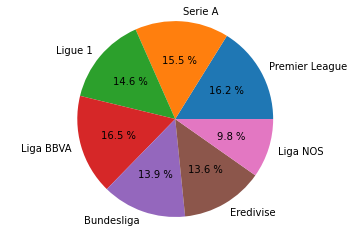

In [ ]:

valores = [PLf+PLc,Sf+Sc,L1f+L1c,Esf+Esc,Bf+Bc,ERf+ERc,Pf+Pc]
nombres = ["Premier League","Serie A","Ligue 1","Liga BBVA","Bundesliga","Eredivise","Liga NOS"]

gra.pie(valores, labels=nombres, autopct="%0.1f %%")
gra.axis("equal")
gra.show()



De la grafica anterior podemos apreciar la manera en que se distribuye el total de goles alrededor de las mejores ligas del mundo.

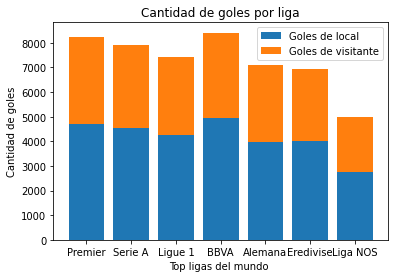

In [ ]:
import numpy as np

grupos = ["Premier","Serie A","Ligue 1","BBVA","Alemana","Eredivise","Liga NOS"]
Local = [PLf,Sf,L1f,Esf,Bf,ERf,Pf]
Visitante = [PLc,Sc,L1c,Esc,Bc,ERc,Pc]
 
indice = np.arange(len(grupos))
 
## Se crean las primeras barras
gra.bar(indice, Local, label='Goles de local')
 
## Se crean las segundas barras y se apilan sobre las primeras
gra.bar(indice, Visitante, label='Goles de visitante',  bottom=Local)
 
gra.xticks(indice, grupos)
gra.ylabel("Cantidad de goles")
gra.xlabel("Top ligas del mundo ")
gra.title('Cantidad de goles por liga')
gra.legend()
 
gra.show()

Del grafico anterior podemos obtener informacion relevante acerca de la cantidad de goles y su distribucion (goles de local o goles de visitante) en las mejores ligas del mundo.

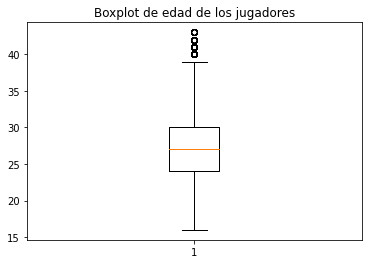

In [ ]:
#Grafica de bigotes que nos da informacion acerca de la edad de los jugadores
Data=base_soccer['Edad']

gra.boxplot(Data)
gra.title("Boxplot de edad de los jugadores")
gra.show()

Boxplot que muestra el intervalo de edad de los jugadores, desde el inicio de su carrera hasta su retiro, ademas del promedio de la edad de los jugadores a estudiar.

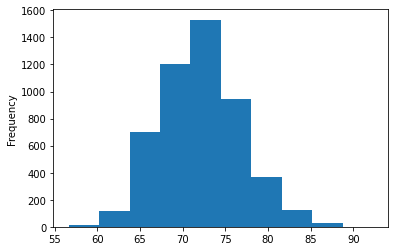

In [ ]:
#Histograma de frecuencia con las calificaciones generales de los jugadores
base_jugadores_totales[base_jugadores_totales['Calificacion Promedio']<100]['Calificacion Promedio'].plot.hist()

De esta gráfica, vemos que hay muy pocos jugadores con una calificación general mayor a 85, aquellos jugadores por ende, son catalogados como la élite del futból, y será donde nos enfocaremos principalmente para analizar las cualidades de dichos jugadores.

No handles with labels found to put in legend.


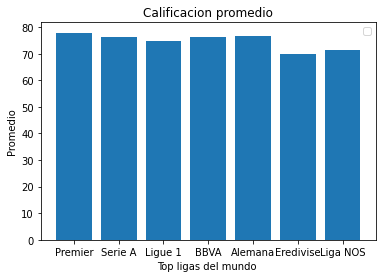

In [ ]:

grupos = ["Premier","Serie A","Ligue 1","BBVA","Alemana","Eredivise","Liga NOS"]
Datos = [PL1,S,L1,Es,B,E,P]
indice = np.arange(len(grupos))

## Se crean las primeras barras
gra.bar(indice, Datos)

 
gra.xticks(indice, grupos)
gra.ylabel("Promedio")
gra.xlabel("Top ligas del mundo ")
gra.title('Calificacion promedio')
gra.legend()
 
gra.show()

Vemos una comparativa de la calificación promedio de los jugadores de acuerdo a la liga en la que participan, donde vemos que de manera general todas estan muy parejas, sin embargo la liga inglesa y alemana superan a la media, por lo que se espera que la calidad de los jugadores de esas ligas son más constantes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


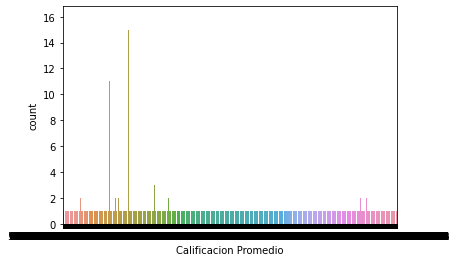

In [ ]:
sns.countplot(base_jugadores_totales['Calificacion Promedio'])

Esta gráfica no se puede utilizar ya que los valores que toma x no son uniformes

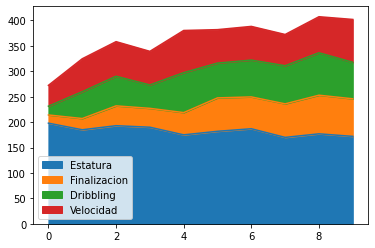

In [ ]:

seleccion=base_jugadores_totales.iloc[:, [8,10,14,20]]
seleccion.head(10).plot.area()


De los 4 factores tratados en la gráfica, vemos que la estatura es un valor mas constante a diferencia de, por ejemplo, la velocidad, la cual varia mucho, puede ser por el factor edad, otra que también cambia mucho es el dribbling, y es normal ya que estamos comparando todos los jugadores, por lo que un defensa o portero muy difícilmente tendrán las mismas habilidades que un atacante.

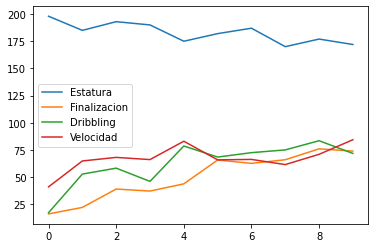

In [ ]:
seleccion.head(10).plot.line()

Este es el mismo caso que el anterior, podemos apreciar como se comportan las mismas 4 características, sin embargo, este gráfico nos es más útil ya que vemos los datos con valores reales, y no como acumulados en la gráfica anterior.

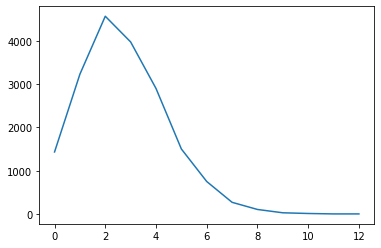

In [ ]:
base_unica_partidos['Total de gol'].value_counts().sort_index().plot.line()

En la grafica observamos el comportamiento del total de goles, obtiendo como resultado que por lo general se anotan 2 goles por partido. 

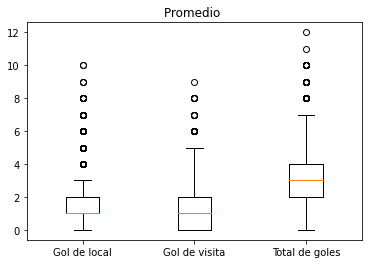

In [ ]:

base_unica_partidos.insert(54,"Total de gol",base_unica_partidos['GolLocal']+base_unica_partidos['GolVisitante'],True)

grupos=["Gol de local", "Gol de visita", "Total de goles"]
data_a=base_unica_partidos['GolLocal']
data_b=base_unica_partidos['GolVisitante']
data_c=base_unica_partidos['Total de gol']

data_2d=[data_a,data_b,data_c]

gra.boxplot(data_2d,labels=grupos)
gra.title("Promedio ")
gra.show()

Este boxplot nos muestra de manera visual la dispersión de la cantidad de goles segun si el equipo juega de local o visitante, a su vez, la última caja muestra los goles por partido, donde vemos que en promedio son 3. Tambíen muestran como datos atípicos partidos con +7 goles, lo cuál tiende a ser inusual.

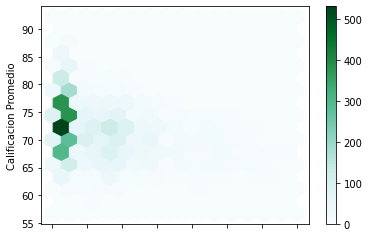

In [ ]:
base_jugadores_totales[base_jugadores_totales['Calificacion Promedio'] <100].plot.hexbin(x='ID', y='Calificacion Promedio', gridsize=15)

En la grafica vemos las frecuencias de las Calificaciones promedio de cada jugador.

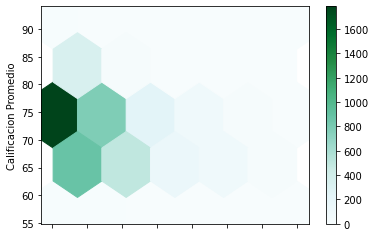

In [ ]:
base_jugadores_totales[base_jugadores_totales['Calificacion Promedio'] <100].plot.hexbin(x='ID', y='Calificacion Promedio', gridsize=5)

En la grafica vemos las frecuencias de las Calificaciones promedio de cada jugador pero en una escala mayor.

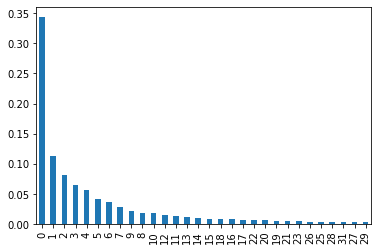

In [ ]:

(base_jugadores_totales['Goles'].value_counts().head(30)/len(base_jugadores_totales)).plot.bar()


Gráfica de barras con proporción de la columna "Goles" esta gráfica nos muestra en el eje x el número de goles y en el eje y el porcentaje que ocupan del total.

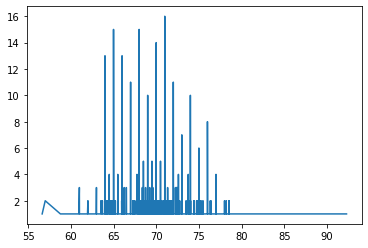

In [ ]:

base_jugadores_totales['Calificacion Promedio'].value_counts().sort_index().plot.line()

Este histgrama no nos arroja la suficiente informacion ya que son datos individuales los cuales en nuestro caso no son uniformes o categoricos

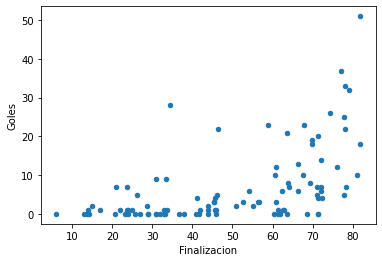

In [ ]:
base_jugadores_totales[base_jugadores_totales['Goles'] < 100].sample(100).plot.scatter(x='Finalizacion', y='Goles')

Grafica de una muestra de 100 datos que nos enseña como se distribuye la cantidad de goles de acuerdo a la finalizacion de los jugadores.

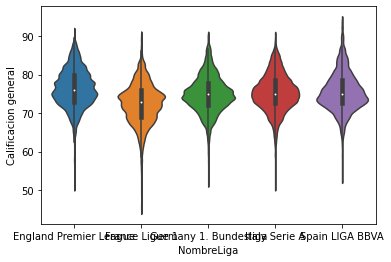

In [ ]:
sns.violinplot(
    x='NombreLiga',
    y='Calificacion general',
    data=base_soccer[base_soccer.NombreLiga.isin(base_soccer.NombreLiga.value_counts()[:5].index)]
)

La gráfica de violín nos muestra la frecuencia, el rango intercuartílico y la mediana de las calificaciones generales.

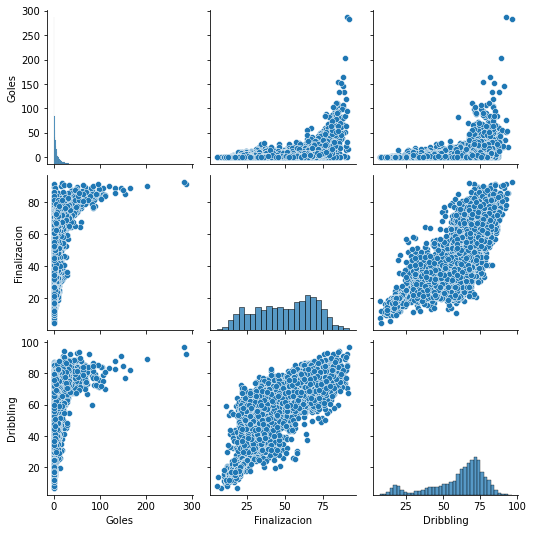

In [ ]:
sns.pairplot(base_jugadores_totales[['Goles', 'Finalizacion', 'Dribbling']])


En esta matriz vemos la correlación entre cada una de las variables de goles, finalizacion y dribbling.

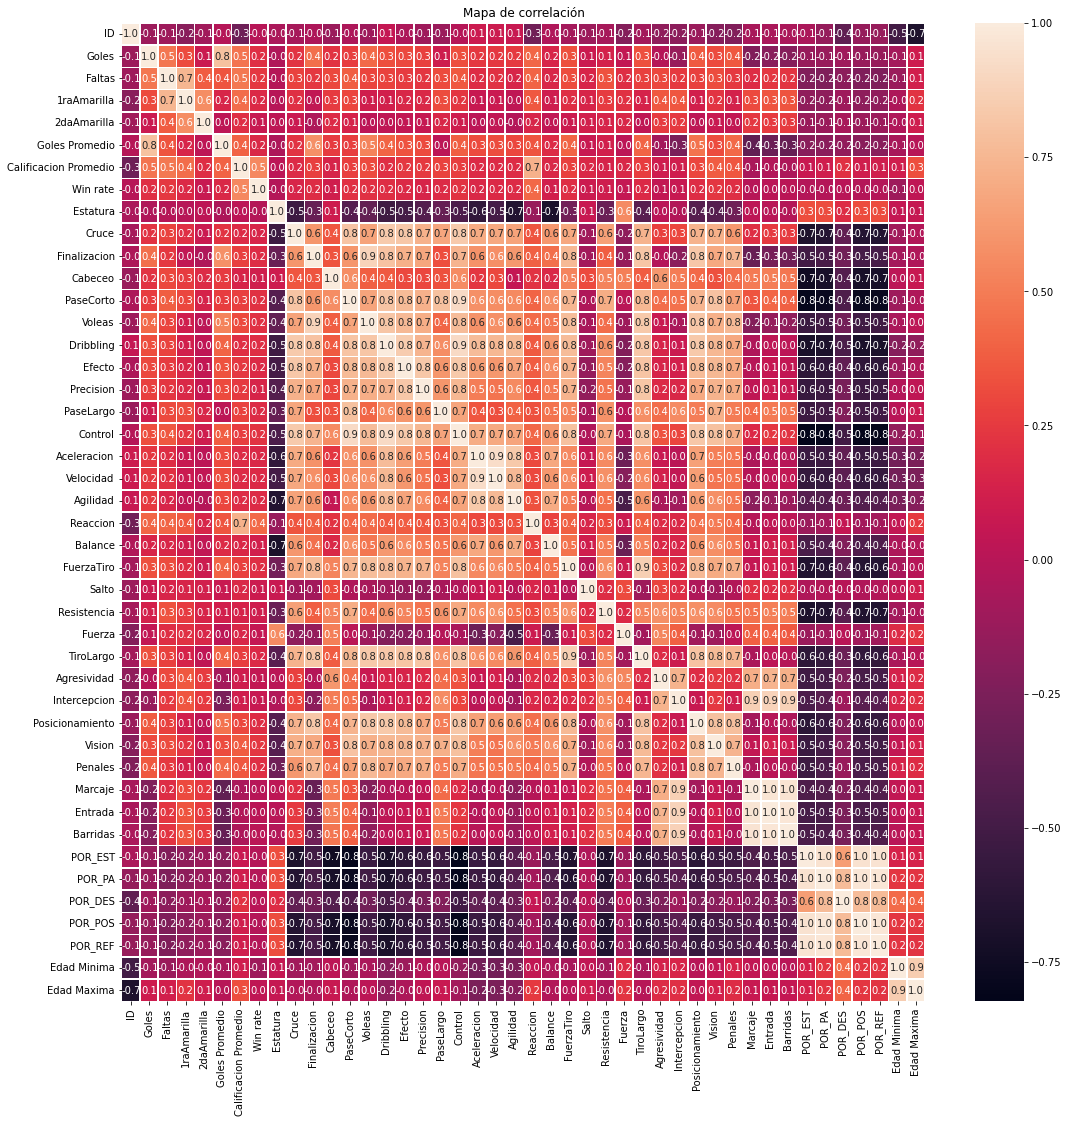

In [ ]:
f,ax=gra.subplots(figsize = (18,18))
sns.heatmap(base_jugadores_totales.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
gra.xticks(rotation=90)
gra.yticks(rotation=0)
gra.title('Mapa de correlación')
gra.show()




En este mapa vemos la relacion entre las variables

## **Base Precios Ajustados**


Se optó por utilizar sólo la base de precios ajustados debido a que es la que presenta la información más útil en comparación con las otras tres bases que se trabajaron durante la previa fase. A esta ya se le han realizado las modificaciones necesarias durante la primera fase para eliminar aquellas columnas que no brindaban la información que se necesitaba y para asegurarse de que ésta se encontraba en el formato apropiado
.


In [ ]:
import os
import pandas as pd
import numpy as np

Tras la lectura de las librerías necesarias, se procede a leer la base. 

In [ ]:
base_precios=pd.read_table('/content/sample_data/Base Precios Ajustados Modificada.csv', sep=',')


In [ ]:
base_precios

,Unnamed: 0,Fecha,Simbolo,Apertura,Cierre,Baja,Alta,volume
0,0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...,...
851259,851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [ ]:
df=pd.DataFrame(base_precios,columns=['Apertura','Cierre','Baja','Alta','volume'])
df

,Apertura,Cierre,Baja,Alta,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...
851259,103.309998,103.199997,102.849998,103.930000,973800.0
851260,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,44.730000,45.450001,44.410000,45.590000,1380900.0


# **Suma**


Se calcula la suma de los valores de cada columna. Este dato podría no ser tan útil para el estudio.

In [ ]:
Sumaap=sum(base_precios['Apertura'])
print("Suma Apertura: ",Sumaap)
sumacierre=sum(base_precios['Cierre'])
sumabaja=sum(base_precios['Baja'])
sumaalta=sum(base_precios['Alta'])
sumavolume=sum(base_precios['volume'])
print("Suma Baja: ",sumabaja)
print("Suma Alta: ",sumaalta)
print("Suma Cierre: ",sumacierre)
print("Suma Volumen: ",sumavolume)

Suma Apertura:  55326727.00239569
Suma Baja:  54767381.173846625
Suma Alta:  55876754.10649839
Suma Cierre:  55342300.888593376
Suma Volumen:  4609690446400.0


# **Promedio**

Se calcula el valor del promedio de valores en cada columna. Este dato sí que podría resultar útil para el estudio, puesto que brinda un punto de referencia importante para evaluar cada registro para clasificarlo como un valor alto o bajo, por ejemplo.

In [ ]:
print("Promedio Apertura: ",df['Apertura'].mean())
print("Promedio Cierre: ",df['Cierre'].mean())
print("Promedio Alta: ",df['Alta'].mean())
print("Promedio Baja: ",df['Baja'].mean())
print("Promedio volumen: ",df['volume'].mean())

Promedio Apertura:  64.99361772892509
Promedio Cierre:  65.01191274222025
Promedio Alta:  65.63974760649856
Promedio Baja:  64.33654092484426
Promedio volumen:  5415112.640027066


# **Suma acumulada**


In [ ]:
print("Suma acumulada Apertura: ",df['Apertura'].cumsum())
print("Suma acumulada Cierre: ",df['Cierre'].cumsum())
print("Suma acumulada Alta: ",df['Alta'].cumsum())
print("Suma acumulada Baja: ",df['Baja'].cumsum())
print("Suma acumulada volumen: ",df['volume'].cumsum())

Suma acumulada Apertura:  0         1.234300e+02
1         2.486700e+02
2         3.650500e+02
3         4.805300e+02
4         5.975400e+02
              ...     
851259    5.532653e+07
851260    5.532657e+07
851261    5.532663e+07
851262    5.532667e+07
851263    5.532673e+07
Name: Apertura, Length: 851264, dtype: float64
Suma acumulada Cierre:  0         1.258400e+02
1         2.458200e+02
2         3.607700e+02
3         4.773900e+02
4         5.923600e+02
              ...     
851259    5.534211e+07
851260    5.534215e+07
851261    5.534220e+07
851262    5.534225e+07
851263    5.534230e+07
Name: Cierre, Length: 851264, dtype: float64
Suma acumulada Alta:  0         1.262500e+02
1         2.517900e+02
2         3.715300e+02
3         4.889700e+02
4         6.063000e+02
              ...     
851259    5.587656e+07
851260    5.587660e+07
851261    5.587665e+07
851262    5.587670e+07
851263    5.587675e+07
Name: Alta, Length: 851264, dtype: float64
Suma acumulada Baja:  0         1.

# **Resumen estadistico**

Esta función resulta ser una de las más útiles para el análisis estadístico de la base de datos, uesto que brinda un resumen descriptivo de cada una de las columnas. Cada uno de los estadísticos obtenidos resulta útil para el análisis. 

In [ ]:
print("Descripcion Apertura: ",df['Apertura'].describe())
print("Descripcion Cierre: ",df['Cierre'].describe())
print("Descripcion Alta: ",df['Alta'].describe())
print("Descripcion Baja: ",df['Baja'].describe())
print("Descripcion volumen: ",df['volume'].describe())

Descripcion Apertura:  count    851264.000000
mean         64.993618
std          75.203893
min           1.660000
25%          31.270000
50%          48.459999
75%          75.120003
max        1584.439941
Name: Apertura, dtype: float64
Descripcion Cierre:  count    851264.000000
mean         65.011913
std          75.201216
min           1.590000
25%          31.292776
50%          48.480000
75%          75.139999
max        1578.130005
Name: Cierre, dtype: float64
Descripcion Alta:  count    851264.000000
mean         65.639748
std          75.906861
min           1.810000
25%          31.620001
50%          48.959999
75%          75.849998
max        1600.930054
Name: Alta, dtype: float64
Descripcion Baja:  count    851264.000000
mean         64.336541
std          74.459518
min           1.500000
25%          30.940001
50%          47.970001
75%          74.400002
max        1549.939941
Name: Baja, dtype: float64
Descripcion volumen:  count    8.512640e+05
mean     5.415113e+06
st

# **Contador**

Ésta función brinda simplemente un conteo de datos que no sean nulos. Como la base de datos ya ha sido limpiada de datos nulos, el valor para cada columna es el mismo.

In [ ]:
print("Conteo Apertura: ",df['Apertura'].count())
print("Conteo Cierre: ",df['Cierre'].count())
print("Conteo Alta: ",df['Alta'].count())
print("Conteo Baja: ",df['Baja'].count())
print("Conteo volumen: ",df['volume'].count())

Conteo Apertura:  851264
Conteo Cierre:  851264
Conteo Alta:  851264
Conteo Baja:  851264
Conteo volumen:  851264


# **Minimo y máximo por columna**

Esta función devuelve el dato mayor y menor valor de cada columna. Este punto podría resultar útil para calcular el rango entre el que se encuentran todos los valores de la columna.

In [ ]:
print("Minimo Apertura: ",df['Apertura'].min())
print("Minimo Cierre: ",df['Cierre'].min())
print("Minimo Alta: ",df['Alta'].min())
print("Minimo Baja: ",df['Baja'].min())
print("Minimo volumen: ",df['volume'].min())

print("Maximo Apertura: ",df['Apertura'].max())
print("Maximo Cierre: ",df['Cierre'].max())
print("Maximo Alta: ",df['Alta'].max())
print("Maximo Baja: ",df['Baja'].max())
print("Maximo volumen: ",df['volume'].max())


Minimo Apertura:  1.66
Minimo Cierre:  1.59
Minimo Alta:  1.81
Minimo Baja:  1.5
Minimo volumen:  0.0
Maximo Apertura:  1584.439941
Maximo Cierre:  1578.130005
Maximo Alta:  1600.930054
Maximo Baja:  1549.939941
Maximo volumen:  859643400.0


# **Mediana**

Función que calcula el valor central de cada columna.

In [ ]:
print("Mediana Apertura: ",df['Apertura'].median())
print("Mediana Cierre: ",df['Cierre'].median())
print("Mediana Alta: ",df['Alta'].median())
print("Mediana Baja: ",df['Baja'].median())
print("Mediana volumen: ",df['volume'].median())

Mediana Apertura:  48.459999
Mediana Cierre:  48.48
Mediana Alta:  48.959999
Mediana Baja:  47.970001
Mediana volumen:  2476250.0


# **Varianza**

El cálculo de la varianza de los datos de cada columna que es uno de los elementos de la estadística descriptiva más relevantes.

In [ ]:
print("Varianza Apertura: ",df['Apertura'].var())
print("Varianza Cierre: ",df['Cierre'].var())
print("Varianza Alta: ",df['Alta'].var())
print("Varianza Baja: ",df['Baja'].var())
print("Varianza volumen: ",df['volume'].var())

Varianza Apertura:  5655.625509652715
Varianza Cierre:  5655.222888944819
Varianza Alta:  5761.851544056541
Varianza Baja:  5544.219832699518
Varianza volumen:  156117064114247.84


# **Desviación estándar**

Se calcula la desviación estándar de cada columna como una métrica de qué tan dispersos se encuentran los valores en ella.

In [ ]:
print("Desviacion estandar Apertura: ",df['Apertura'].std())
print("Desviacion estandar Cierre: ",df['Cierre'].std())
print("Desviacion estandar Alta: ",df['Alta'].std())
print("Desviacion estandar Baja: ",df['Baja'].std())
print("Desviacion estandar volumen: ",df['volume'].std())

Desviacion estandar Apertura:  75.2038929155447
Desviacion estandar Cierre:  75.20121600708873
Desviacion estandar Alta:  75.90686098144582
Desviacion estandar Baja:  74.4595180799575
Desviacion estandar volumen:  12494681.433083752


# **Valor de asimetría**

Función que calcula la asimetría de los datos, esto es, qué tan parecido es el número de datos que se encuentran de cada lado de la media (mayores y menores). Esto podría ser útil en el análisis para determinar si los precios han presentado más bajas que subidas, por ejemplo.

In [ ]:
print("Asimetría Apertura: ",df['Apertura'].skew())
print("Asimetría Cierre: ",df['Cierre'].skew())
print("Asimetría Alta: ",df['Alta'].skew())
print("Asimetría Baja: ",df['Baja'].skew())
print("Asimetría volumen: ",df['volume'].skew())

Asimetría Apertura:  7.240054585133092
Asimetría Cierre:  7.236975121643047
Asimetría Alta:  7.236056092212262
Asimetría Baja:  7.239734104205494
Asimetría volumen:  13.132746281013521


# **Curtosis**

Valor que indica qué tan concentrados se encuentran los valores cerca de la media.

In [ ]:
print("Curtosis Apertura: ",df['Apertura'].kurt())
print("Curtosis Cierre: ",df['Cierre'].kurt())
print("Curtosis Alta: ",df['Alta'].kurt())
print("Curtosis Baja: ",df['Baja'].kurt())
print("Curtosis volumen: ",df['volume'].kurt())

Curtosis Apertura:  83.74621891001277
Curtosis Cierre:  83.68950396209809
Curtosis Alta:  83.62924481513195
Curtosis Baja:  83.78290725516875
Curtosis volumen:  326.06748798023875


# **Correlación**

Se calcula la correlación que ex

In [ ]:
print("Correlación: ",df.corr())

Correlación:            Apertura    Cierre      Baja      Alta    volume
Apertura  1.000000  0.999845  0.999914  0.999928 -0.132526
Cierre    0.999845  1.000000  0.999926  0.999925 -0.132675
Baja      0.999914  0.999926  1.000000  0.999889 -0.133087
Alta      0.999928  0.999925  0.999889  1.000000 -0.132168
volume   -0.132526 -0.132675 -0.133087 -0.132168  1.000000


Covarianza

In [ ]:
print("Covarianza: ",df.cov())

Covarianza:                Apertura        Cierre          Baja          Alta        volume
Apertura  5.655626e+03  5.654546e+03  5.599162e+03  5.708078e+03 -1.245279e+08
Cierre    5.654546e+03  5.655223e+03  5.599034e+03  5.707862e+03 -1.246636e+08
Baja      5.599162e+03  5.599034e+03  5.544220e+03  5.651361e+03 -1.238168e+08
Alta      5.708078e+03  5.707862e+03  5.651361e+03  5.761852e+03 -1.253522e+08
volume   -1.245279e+08 -1.246636e+08 -1.238168e+08 -1.253522e+08  1.561171e+14


# **Gráficas**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

* **Gráfica de los 20 símbolos con el mayor promedio de los precios de apertura vs los de cierre**

           Apertura      Cierre
Simbolo                        
PCLN     676.421956  676.235763
ISRG     414.054756  414.193248
GOOGL    370.350105  370.167662
GOOG     367.719697  367.510801
AZO      354.027772  354.248683
CMG      345.418020  345.658981
AMZN     234.182460  234.250315
BLK      221.964963  221.886355
GWW      189.698418  189.855286
MTD      181.567962  181.723372
IBM      175.581077  175.705377
TDG      160.068252  160.148208
BIIB     156.797531  156.814905
EQIX     146.283016  146.331458
REGN     145.672960  145.714950
GS       143.537208  143.522278
ADS      142.577713  142.719693
RL       140.993889  141.057927
ESS      140.720862  140.796164
PSA      133.477596  133.551277
--------------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755)


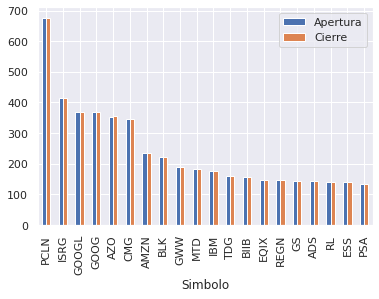

In [ ]:
gs= base_precios.groupby('Simbolo')
ps= gs[ ['Apertura','Cierre'] ].mean()
pso=ps.sort_values('Apertura',ascending=False)[:20]
print(pso)
print('--------------------------------------------------------')

print(pso.plot(kind='bar'))

Con el gráfico anterior podemos ver que los promedios de los precios de apertura y cierre agrupados por símbolos son muy similares. Asimismo podemos observar que no existe mucha diferencia de precios entre los símbolos, excepto por el primer caso. Por lo que podemos concluir que posiblemente estos tengan un patrón aparente e incluso pueden seguir alguna distribución de probabilidad conocida.  

Para observar un poco mejor lo mencionado en la gráfica anterior, realizaremos una comparación directa de los precios de Apertura vs los de Cierre en la siguiente gráfica.

* **Gráfica que compara el precio de apertura vs el precio de cierre**

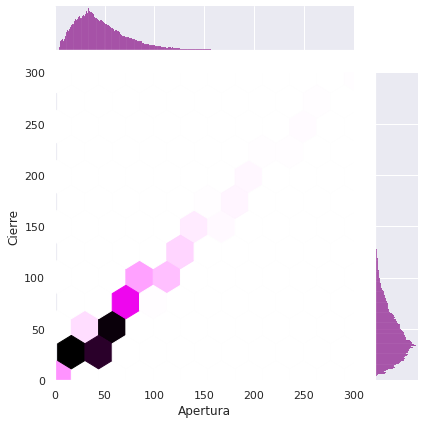

In [ ]:
sns.jointplot(data= base_precios, x='Apertura', y='Cierre', xlim=(0,300), ylim=(0,300),
              kind= 'hex', color='purple', height= 6, space= 0.5, ratio= 5, dropna= False)
plt.show()

Con la gráfica anterior podemos observar que la mayoría de los datos se concentran en los rangos de (0,150), por lo que se puede concluir que los promedios tanto del precio de Apertura como del de Cierre se encuentran dentro de este rango.

Tal y como comparamos los precios de Apertura vs los de Cierre, realizaremos la misma gráfica para comparar las columnas de Alta y Baja

* **Gráfica que compara el precio Alto contra el precio Bajo**

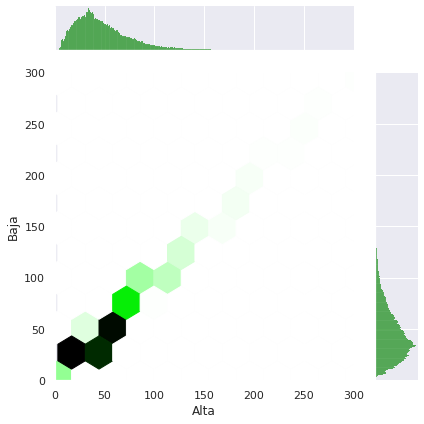

In [ ]:
sns.jointplot(data= base_precios, x='Alta', y='Baja', xlim=(0,300), ylim=(0,300),
              kind= 'hex', color='green', height= 6, space= 0.5, ratio= 5, dropna= False)
plt.show()

Con la gráfica anterior podemos observar que la mayoría de los datos se concentran en los rangos de (0,150), por lo que se puede concluir que los promedios tanto del precio de Alto como del Bajo se encuentran dentro de este rango.  
Con esto también podemos concluir que los precios altos y bajos no se diferencían en gran cantidad de los precios de Apertura y Cierre, sino que se quedaron dentro del mismo rango.

Para observar un caso más específico de dicha comparación entre los precios Alta y Baja, a continuación realizaremos una gráfica donde observaremos cómo se comportaron dichos precios en las fechas más recientes.  
Asimismo, se agregarán los precios de Apertura y Cierre para observar el modelo completo.

* **Gráfica de los promedios de los precios Alta, Apertura, Cierre y Baja de las 5 fechas más recientes**

                  Alta    Apertura      Cierre        Baja
Fecha                                                     
2016-12-23  124.660004  123.089996  124.489998  122.709999
2016-12-27  124.900002  124.570000  124.279999  124.010002
2016-12-28  124.300003  124.300003  122.379997  121.900002
2016-12-29  123.070000  122.449997  122.169998  121.599998
2016-12-30  123.559998  122.589996  122.279999  121.389999
--------------------------------------------------------


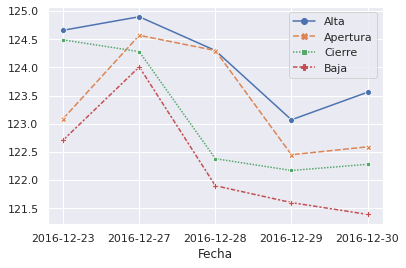

In [ ]:
gf= base_precios.groupby('Fecha')
mf= gf[ ['Alta','Apertura','Cierre','Baja'] ].mean()
mfo=mf.sort_values('Fecha',ascending=True).tail(5)
print(mfo)
print('--------------------------------------------------------')

sns.lineplot(data= mfo, palette= 'deep', markers=True, ci= 95)
plt.show()

Con la gráfica anterior podemos observar los promedios de precios de las fechas más recientes. De acuerdo a la información mostrada en la gráfica, podemos decir que en promedio los precios de Alta y Baja se mantuvieron con la misma tendencia; mientras que los precios de Apertura y Cierre fueron muy variables, ya que sus lineas de tendencia se cruzan en varios puntos.

Finalmente, analizaremos la columna de volumen. Para analizar dicha columna, realizaremos el siguiente gráfico donde podremos observar cómo se comportó el volumen promedio por Símbolo.

* **Gráfica que muestra el volumen máximo por símbolo**

              volume
Simbolo             
A         25368600.0
AAL       78591200.0
AAP        7767100.0
AAPL     470249500.0
ABBV     122740200.0
...              ...
YHOO     233872100.0
YUM       40539600.0
ZBH       12394500.0
ZION      26333100.0
ZTS       66789100.0

[491 rows x 1 columns]
--------------------------------------------------------


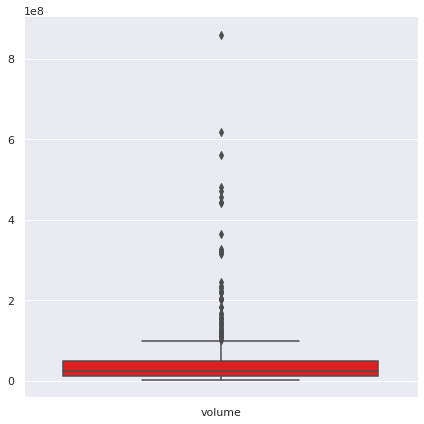

In [ ]:
gs= base_precios.groupby('Simbolo')
mv= gs[ ['volume'] ].max()
print(mv)
print('--------------------------------------------------------')

sns.catplot(data= mv, kind= 'box', height=6, orient='v', color= 'red', legend= 'True', legend_out='True')
plt.show()

Con la gráfica anterior podemos ver cómo se comportan los máximos volumenes de cada símbolo. Con los resultados obtenidos, podemos obersvar que la mayoría de los datos están concentadros en el rango de (0,2e^8), pero también tenemos datos que se encuentran por encima de este rango, los cuales generan cambios en algunos parámetros como la media y la mediana.  

## **Puntos extra**

* Realizar una o más gráficas (con las mismas o diferentes librerías de las que se utilizaron en este trabajo) diferentes a las que están en la práctica.

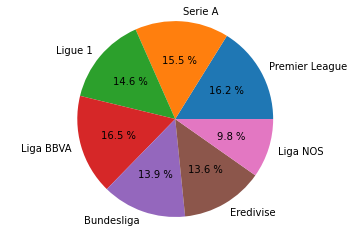

In [ ]:
valores = [PLf+PLc,Sf+Sc,L1f+L1c,Esf+Esc,Bf+Bc,ERf+ERc,Pf+Pc]
nombres = ["Premier League","Serie A","Ligue 1","Liga BBVA","Bundesliga","Eredivise","Liga NOS"]

gra.pie(valores, labels=nombres, autopct="%0.1f %%")
gra.axis("equal")
gra.show()




* Realizar una comparacion entre dos gráficas diferentes que parezcan dar la misma información. Cual es mejor en cual caso y explicar porque.

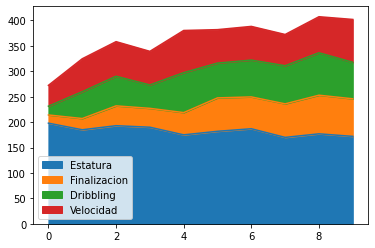

In [ ]:

seleccion=base_jugadores_totales.iloc[:, [8,10,14,20]]
seleccion.head(10).plot.area()


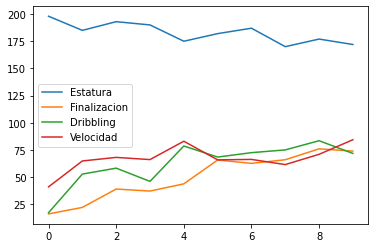

In [ ]:
seleccion.head(10).plot.line()

De los 4 factores tratados en la gráfica, vemos que la estatura es un valor mas constante a diferencia de, por ejemplo, la velocidad, la cual varia mucho, puede ser por el factor edad, otra que también cambia mucho es el dribbling, y es normal ya que estamos comparando todos los jugadores, por lo que un defensa o portero muy difícilmente tendrán las mismas habilidades que un atacante.
Este es el mismo caso que el anterior, podemos apreciar como se comportan las mismas 4 características, sin embargo, este gráfico nos es más útil ya que vemos los datos con valores reales, y no como acumulados en la gráfica anterior.